# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
#%matplotlib ipympl

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_mice = combined_df['Mouse ID'].nunique()
number_mice


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df[combined_df["Mouse ID"] == "g989"].index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_df["Mouse ID"].nunique()
num_clean_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
standard_deviation = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": standard_deviation,
    "Tumor Volume Std. Err.": sem
    })
summary_stats.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# First need to format a series to make a plot from
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

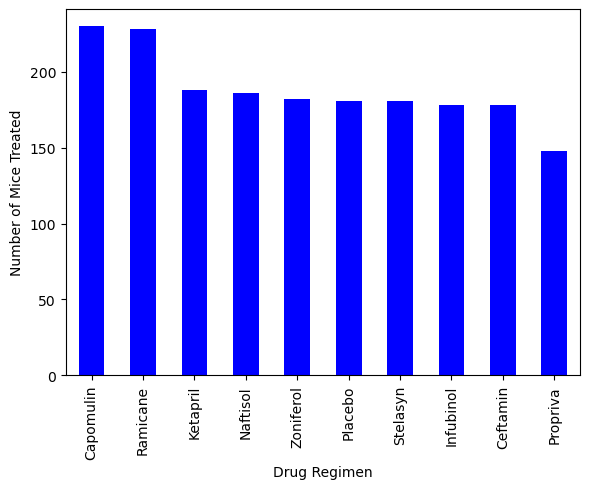

In [11]:
# Now to generate the bar plot using Pandas
pandas_barplot = mice_count.plot(kind="bar", color="blue", figsize=(6,5))
pandas_barplot.set_xlabel("Drug Regimen")
pandas_barplot.set_ylabel("Number of Mice Treated")

# Making the bar plot fit nicely
plt.tight_layout()


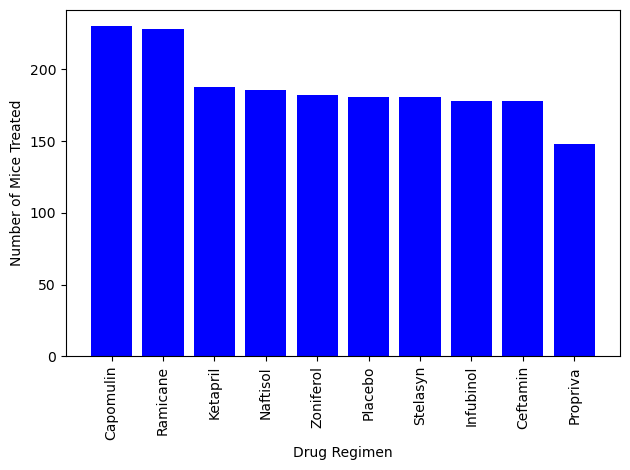

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Setup and label axes
plt.bar(x_axis, y_axis, color="blue", alpha=1, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")
plt.xticks(rotation="vertical")
plt.tight_layout()

# Display the bar plot
#plt.show()

In [13]:
# Set the values and confirm counts
genders = clean_df["Sex"].value_counts()
genders


Sex
Male      958
Female    922
Name: count, dtype: int64

<Axes: ylabel=' '>

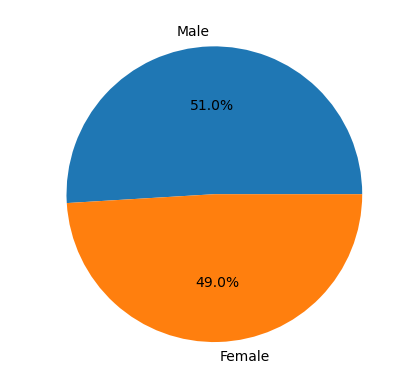

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders.plot(kind="pie", autopct="%1.1f%%", label=" ")

([<matplotlib.patches.Wedge at 0x22b33464e10>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

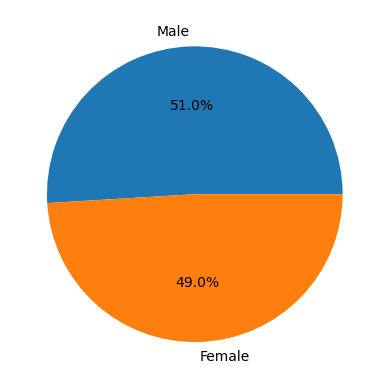

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
data = genders
plt.pie(data, labels=labels, autopct="%1.1f%%", shadow=False)


## Quartiles, Outliers and Boxplots

In [16]:
# Get the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, clean_df, on=("Mouse ID", "Timepoint"), how="left")
merged_last_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes 
for drug in treatment_list:
    drug_data = merged_last_timepoint.loc[merged_last_timepoint["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    final_tumor_volume_list.append(drug_data)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. Determine the outliers using upper and lower bounds
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]

    # Print results
    treatment = 0
    if treatment ==0:
        print(f"------------------------------------")
    print(f"Results for {drug}:")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"Interquartile Range (IQR): {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("Potential Outliers:")
    print(outliers)
    print(f"------------------------------------")
    treatment+=1

------------------------------------
Results for Capomulin:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Interquartile Range (IQR): 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------
------------------------------------
Results for Ramicane:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Interquartile Range (IQR): 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------
------------------------------------
Results for Infubinol:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Interquartile Range (IQR): 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------------
---------

Text(0, 0.5, 'Final Tumor Volume (mm3)')

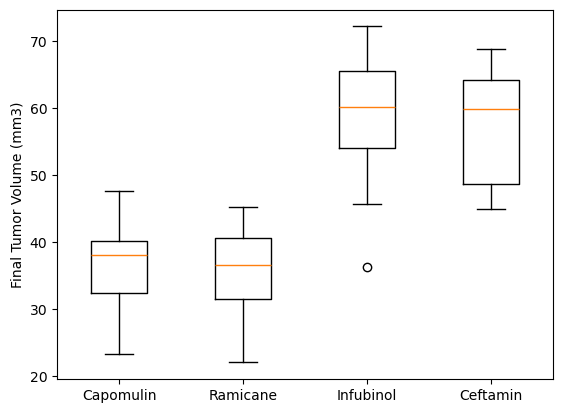

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(final_tumor_volume_list, labels=treatment_list);

plt.ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_mice = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capo_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
Name: count, dtype: int64

In [20]:
# Single mouse l509
mouse_l509 = clean_df.loc[clean_df["Mouse ID"]=="l509"]

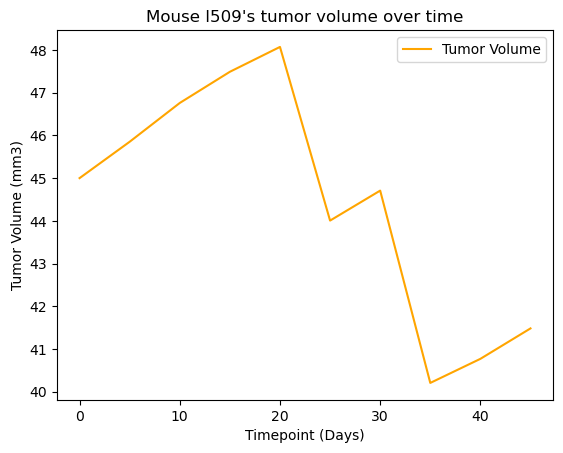

In [21]:
# Generating the line plot of tumor volume vs. time point for a single mouse 'l897' treated with Capomulin
x_time = mouse_l509["Timepoint"]
y_tumor = mouse_l509["Tumor Volume (mm3)"]

plt.plot(x_time, y_tumor, color="orange", label="Tumor Volume")
plt.legend(loc="best")
plt.title("Mouse l509's tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(x_time), max(x_time)+1, 10))
plt.ylabel("Tumor Volume (mm3)")

plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

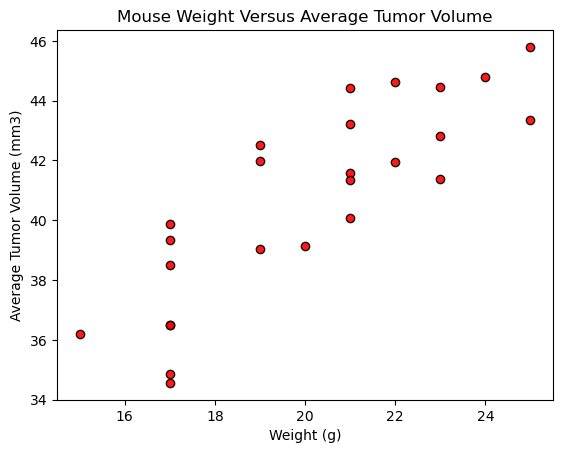

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Get average tumor volume
avg_tumor_volume = capo_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capo_mice.groupby("Mouse ID")["Weight (g)"].first()

# Plot the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, marker="o", facecolors="red", edgecolors="black", alpha=0.9)
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
